#**Introduction:**
Natural Language Processing (NLP) is a subfield of linguistics Artficial Inteligence (AI). It deals with the interactions between computers and human languages. Computers can read text, hear speech, interpret it, measure sentiment and determine which parts are important within the text. 



*   AI Algorithm reads millions of text examples written by humans
*   Algorithms gain understanding of the context
*   This helps in differentiating between meaning of various texts

**Applications:** Optical Character Recognition (OCR), Speech Recognition, Machine Translation, and Chatbots etc.


#**Text Preprocessing**
To preprocess your text simply means to bring your text into a form that is ***predictable*** and ***analyzable*** for your task. A task here is a combination of approach and domain. Following preprocessing techniques are discussed in this tutorial.

* Tokenization
* Stopword Removal
* N- Grams
* Stemming
* Word Sense Disambiguation
* Count Vectorizer
* TF-IDF(TfidfVectorizer)
* HashingVectorizer

**Tokenization**

It is task of breaking a text into pieces called as token.

**Types:**
* **Word Tokenization:** Word Tokenization breaks all the text into words (i.e. Split at space BUT a bit different)
* **Sentence Tokenization:** Sentence tokenization breaks text into sentences (i.e. Splict at period)


In [42]:
# download the require corpuses from nltk
"""
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
"""


"\nimport nltk\nnltk.download('stopwords')\nnltk.download('punkt')\nnltk.download('wordnet')\n"

In [11]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

text = "This would help readers to understant the improtance of preprocessing in general and tokenization specific. As well as realize its importance"
#words_split = text.split(" ")
words = word_tokenize(text)
print(len(words))
#print(len(words_split)) for displaying the difference between split and word_tokenize

sents = sent_tokenize(text)
sents


23


['This would help readers to understant the improtance of preprocessing in general, and tokenization specific.',
 'As well as realize its importance']

**Stop Word Removal**
* Stopwords are the English words which does not add much meaning to a sentence.
* They can safely be ignored without sacrificing the meaning of the sentence.
* A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) 

In [18]:
from nltk.tokenize import  word_tokenize
from nltk.corpus import stopwords
from string import punctuation

custom_list = set (stopwords.words('english')+list(punctuation)) # set of all english stop words and punctuations

# print(custom_list) # print to see the stop words and punctuations

word_list = [word for word in word_tokenize(text) if word not in custom_list]
word_list


['This',
 'would',
 'help',
 'readers',
 'understant',
 'improtance',
 'preprocessing',
 'general',
 'tokenization',
 'specific',
 'As',
 'well',
 'realize',
 'importance']

**N-Grams**

An n-gram is a contiguous sequence of n items from a given sample
of text or speech.
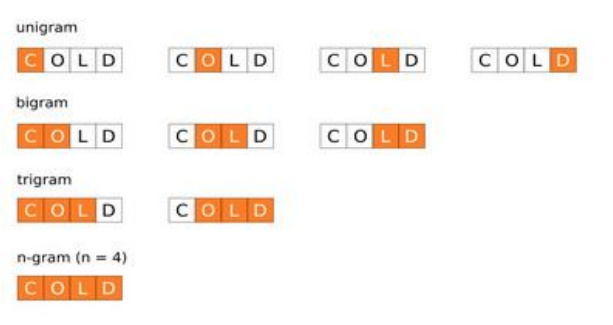

In [22]:
from nltk.collocations import BigramCollocationFinder

finde =  BigramCollocationFinder.from_words(word_list)
print(finde.ngram_fd.items())


dict_items([(('This', 'would'), 1), (('would', 'help'), 1), (('help', 'readers'), 1), (('readers', 'understant'), 1), (('understant', 'improtance'), 1), (('improtance', 'preprocessing'), 1), (('preprocessing', 'general'), 1), (('general', 'tokenization'), 1), (('tokenization', 'specific'), 1), (('specific', 'As'), 1), (('As', 'well'), 1), (('well', 'realize'), 1), (('realize', 'importance'), 1)])

**Stemming**

Stemming is the process of reducing inflected (or sometimes
derived) words to their word stem, base or root form.

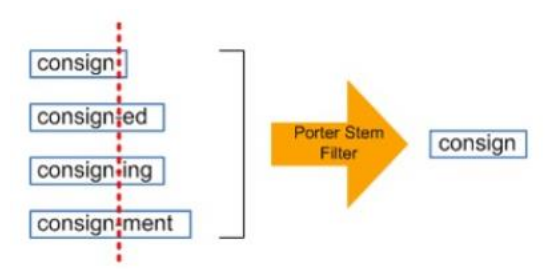


In [4]:
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
l_s = LancasterStemmer() # it uses Suffix Stripping to produce stems

text = 'We are now trying to learn stemming. stemming is being processed to find the root words of a word.'

word_stems =  [l_s.stem(word) for word in word_tokenize (text)]
word_stems


['we',
 'ar',
 'now',
 'try',
 'to',
 'learn',
 'stem',
 '.',
 'stem',
 'is',
 'being',
 'process',
 'to',
 'find',
 'the',
 'root',
 'word',
 'of',
 'a',
 'word',
 '.']

In [7]:
from nltk.stem.snowball import SnowballStemmer

englishStemmer=SnowballStemmer("english")

word_stems =  [englishStemmer.stem(word) for word in word_tokenize (text)]
print(word_stems)

#You can tell this stammer to igronore stop words
englishStemmer2=SnowballStemmer("english", ignore_stopwords=True)

word_stems =  [englishStemmer2.stem(word) for word in word_tokenize (text)]
print(word_stems)



['we', 'are', 'now', 'tri', 'to', 'learn', 'stem', '.', 'stem', 'is', 'be', 'process', 'to', 'find', 'the', 'root', 'word', 'of', 'a', 'word', '.']
['we', 'are', 'now', 'tri', 'to', 'learn', 'stem', '.', 'stem', 'is', 'being', 'process', 'to', 'find', 'the', 'root', 'word', 'of', 'a', 'word', '.']


**CountVectorizer**
* Provides a simple way to both tokenize a collection of text documents and
build a vocabulary of known words, but also to encode new documents
using that vocabulary.
* The same vectorizer can be used on documents that contain words not
included in the vocabulary. These words are ignored and no count is given
in the resulting vector.
* Each column represents one word, count refers to frequency of the word
* Sequence of words are not maintained

In [17]:
import pandas as pd

my_corpus = [
        'This is the first document from heaven',
        'but the second document is from mars',
        'And this is the third one from nowhere',
        'Is this the first document from nowhere?'
]

df = pd.DataFrame({'Text':my_corpus})
df


,Text
0,This is the first document from heaven
1,but the second document is from mars
2,And this is the third one from nowhere
3,Is this the first document from nowhere?


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_v = CountVectorizer()
X = count_v.fit_transform(df.Text).toarray()

vocab = count_v.vocabulary_
print('length of vocabulary: ',len(vocab))
print('vocab.\n',vocab)

features = count_v.get_feature_names()
print('features extracted.\n',features)
X


length of vocabulary:  14
vocab.
 {'this': 13, 'is': 6, 'the': 11, 'first': 3, 'document': 2, 'from': 4, 'heaven': 5, 'but': 1, 'second': 10, 'mars': 7, 'and': 0, 'third': 12, 'one': 9, 'nowhere': 8}
features extracted.
 ['and', 'but', 'document', 'first', 'from', 'heaven', 'is', 'mars', 'nowhere', 'one', 'second', 'the', 'third', 'this']


array([[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]])

**TF-IDF(Tfidf Vectorizer)**
* TF-IDF are word frequency scores that try to highlight words that are more
interesting, e.g. frequent in a document but not across documents.
* The importance is in scale of 0 & 1

**Term Frequency:** This summarizes how often a given word appears within a
document.

**Inverse Document Frequency:** This downscales words that appear a lot
across documents.

**Adv:**
* Feature vector much more tractable in size
* Frequency and relevance captured

**DisAdv:**
* Context still not captured 

In [25]:

my_corpus = [
        'This is the first document from heaven',
        'but the second document is from mars',
        'And this is the third one from nowhere',
        'Is this the first document from nowhere?'
]



In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(my_corpus)
print(tfidf_vectorizer.vocabulary_)

print(tfidf_vectorizer.idf_)


{'this': 13, 'is': 6, 'the': 11, 'first': 3, 'document': 2, 'from': 4, 'heaven': 5, 'but': 1, 'second': 10, 'mars': 7, 'and': 0, 'third': 12, 'one': 9, 'nowhere': 8}
[1.91629073 1.91629073 1.22314355 1.51082562 1.         1.91629073
 1.         1.91629073 1.51082562 1.91629073 1.91629073 1.
 1.91629073 1.22314355]


**Spam Ham Filtering a Case Study**


In [43]:
import pandas as pd
corpus = [
          'i earn twenty lakh rupees per month just chitchating on the net!',
          'are you free for a meeting anytime tomorrow?',
          ]
df = pd.DataFrame({'Text':corpus})
from sklearn.feature_extraction.text import CountVectorizer

count_v = CountVectorizer()
X = count_v.fit_transform(df.Text).toarray()
print(X)
print(count_v.vocabulary_)

[[0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0]
 [1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1]]
{'earn': 3, 'twenty': 16, 'lakh': 7, 'rupees': 13, 'per': 12, 'month': 9, 'just': 6, 'chitchating': 2, 'on': 11, 'the': 14, 'net': 10, 'are': 1, 'you': 17, 'free': 5, 'for': 4, 'meeting': 8, 'anytime': 0, 'tomorrow': 15}


In [28]:
new_txt = ['io etrn are you free ruppee for a monnth meeting chitcchting anytime tomorrow neet']
df_new = pd.DataFrame({'new_txt':new_txt})
y = count_v.transform(df_new.new_txt).toarray()
print(y)

[[1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1]]


**Word Sense Disambiguation (WSD)** 

It is the problem of determining which "sense" (meaning) of a word is activated by the use of the word in a particular context.

**Exp:** Bank, Mouse 

In [23]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.wsd import lesk


sent1 = "I went to the bank to deposit money." # financial/savings bank 
sent2 = "Ali took off his trousers by the bank." # edge of river

context1 = lesk(word_tokenize(sent1),'bank')
print(context1, context1.definition())

context2 = lesk(word_tokenize("My mouse is not woking I need to change it"),'mouse')
print(context2, context2.definition())


Synset('savings_bank.n.02') a container (usually with a slot in the top) for keeping money at home
Synset('mouse.n.04') a hand-operated electronic device that controls the coordinates of a cursor on your computer screen as you move it around on a pad; on the bottom of the device is a ball that rolls on the surface of the pad
